In [188]:
import numpy as np
import pandas as pd



In [260]:
df = pd.read_csv(r'C:\Users\Reet\Downloads\dataset\Time_series\Kaggle\data\customer_shopping_data.csv')

In [261]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [262]:
df = df.drop(['gender','age'], axis=1)

In [263]:
df  = df.rename(columns={'customer_id':'passenger_id'}) 

In [264]:
df.head()

,invoice_no,passenger_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Books,4,60.60,Cash,24/10/2021,Kanyon


In [265]:
list(df['category'].unique())

['Clothing',
 'Shoes',
 'Books',
 'Cosmetics',
 'Food & Beverage',
 'Toys',
 'Technology',
 'Souvenir']

In [266]:
df['shopping_mall'].unique()

array(['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM',
       'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall',
       'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center'], dtype=object)

In [267]:
df['quantity'].unique()

array([5, 3, 1, 4, 2], dtype=int64)

### we want to see what number of passengers bought each category of product for each shopping mall

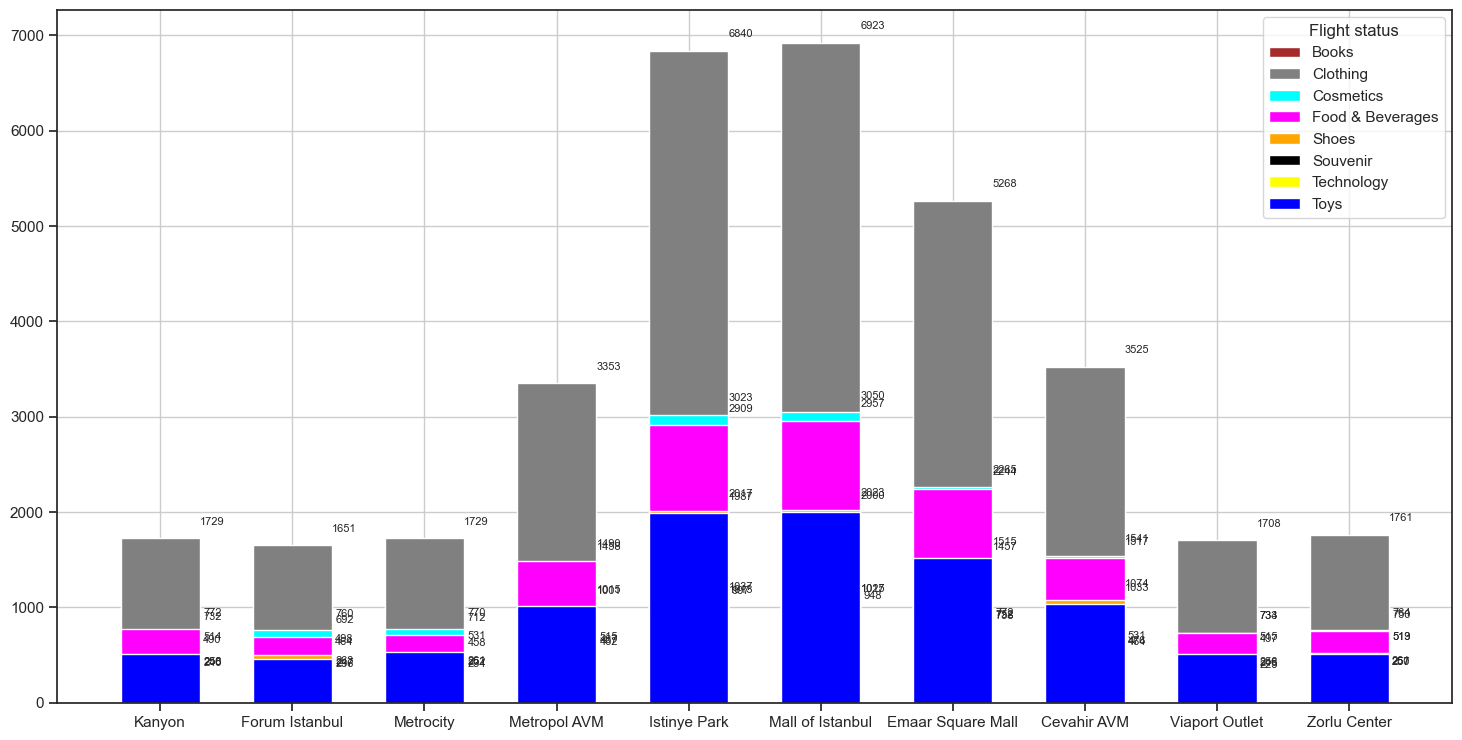

In [268]:
df1 = pd.DataFrame(df.groupby(['shopping_mall','category'])['passenger_id'].count())
df1 = df1.unstack(level = 0)
df1 = df1.T
df1.reset_index()

df1['average_number_passengers']=(df1['Books'] + df1['Clothing'] + df1['Cosmetics'] + df1['Food & Beverage']+ df1['Shoes']
                                    + df1['Souvenir'] + df1['Technology'] + df1['Toys'])/8


x = np.array(list(df.shopping_mall.unique()))


y1 = list(df1['Books'])
y2 = list(df1['Clothing'])
y3 = list(df1['Cosmetics'])
y4 = list(df1['Food & Beverage'])
y5 = list(df1['Shoes'])
y6 = list(df1['Souvenir'])
y7 = list(df1['Technology'])
y8 = list(df1['Toys'])

width = 0.6
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(18,9))
  
# plot data in grouped manner of bar type 
plt.bar(x, y1, width, color='brown') 
plt.bar(x, y2, width, color='grey') 
plt.bar(x, y3, width, color='cyan') 
plt.bar(x, y4, width, color='magenta') 
plt.bar(x, y5, width, color='orange') 
plt.bar(x, y6, width, color='black') 
plt.bar(x, y7, width, color='yellow') 
plt.bar(x, y8, width, color='blue') 


for bar in ax1.patches:
    ax1.annotate(text = bar.get_height(),
                  xy = (bar.get_x() + bar.get_width() / 1.5, bar.get_height()),
                  ha='center', 
                  va='center',
                  size=8,
                  xytext=(28, 12),
                  textcoords='offset points')
plt.legend(['Books', 'Clothing', 'Cosmetics', 'Food & Beverages', 'Shoes', 'Souvenir', 'Technology', 'Toys'], title="Flight status", loc="upper right")
plt.grid(True)
plt.show()

### We want to see how many prducts(quantuty)on each category of product for each payment method

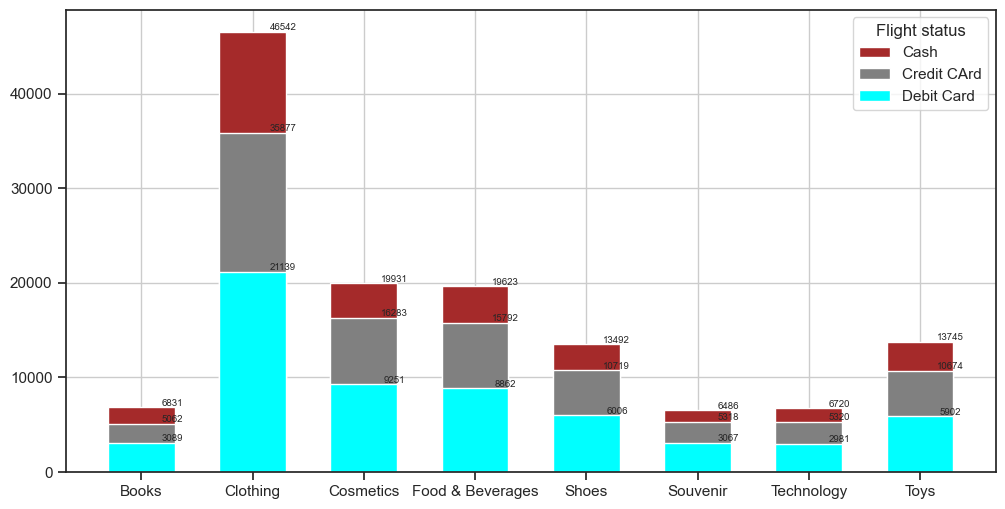

In [269]:
df2 = pd.DataFrame(df.groupby(['category','payment_method'])['quantity'].sum())
df2 = df2.unstack(level = 0)
df2 = df2.T
df2.reset_index()


df2['average_sales']=(df2['Cash'] + df2['Credit Card'] + df2['Debit Card'])/3


import seaborn as sns
fig, ax1 = plt.subplots(figsize=(12,6))

x = np.array(['Books', 'Clothing', 'Cosmetics', 'Food & Beverages', 'Shoes', 'Souvenir', 'Technology', 'Toys'])

y1 = list(df2['Cash'])
y2 = list(df2['Credit Card'])
y3 = list(df2['Debit Card'])

width = 0.6
  
# plot data in grouped manner of bar type 
plt.bar(x, y1, width, color='brown') 
plt.bar(x, y2, width, color='grey') 
plt.bar(x, y3, width, color='cyan') 

for bar in ax1.patches:
    ax1.annotate(text = bar.get_height(),
                  xy = (bar.get_x() + bar.get_width() / 1.5, bar.get_height()),
                  ha='center', 
                  va='center',
                  size=7,
                  xytext=(14, 3),
                  textcoords='offset points')

plt.legend(["Cash", "Credit CArd","Debit Card"], title="Flight status", loc="upper right")
plt.grid(True)

## Total number of items sold across different days.

In [271]:
df4 = df

In [298]:
df4['invoice_date'] = df4['invoice_date'].astype("string") 
df4['invoice_date'] = pd.to_datetime(df4['invoice_date'].astype("string"), format='mixed')

date_grouped = pd.DataFrame(df4.groupby(['invoice_date'])['quantity'].sum())
date_grouped

,quantity
invoice_date,
2021-01-01,333
2021-01-02,330
2021-01-03,303
2021-01-04,343
2021-01-05,346
...,...
2023-10-02,369
2023-11-01,328
2023-11-02,340


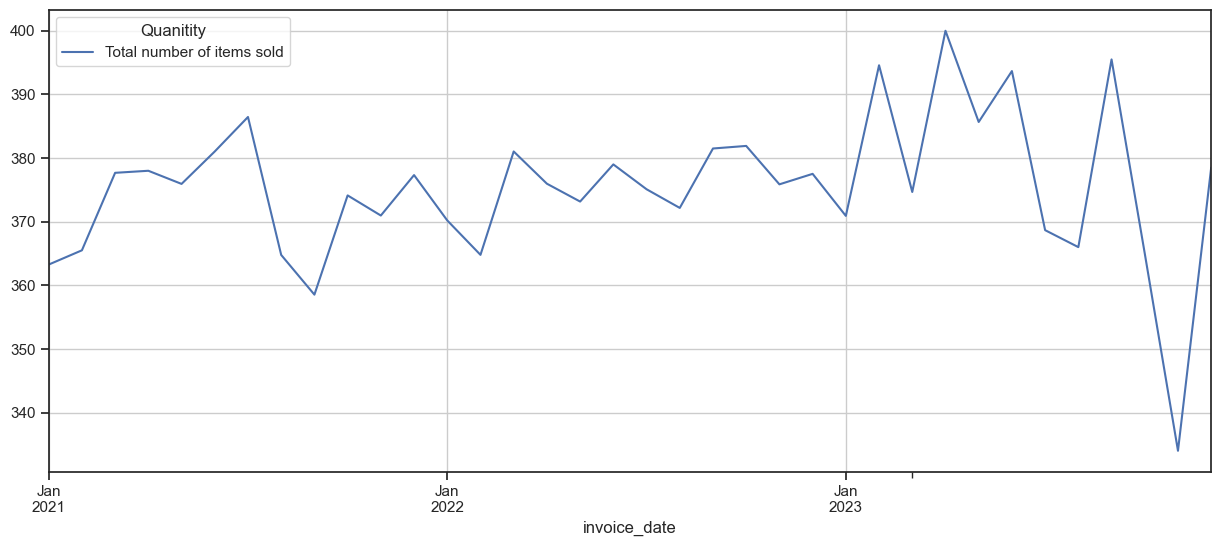

In [347]:
import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%m')

plt.figure(figsize = (15,7))
sns.set(style="ticks")
plt.grid(True)

date_group_sampled = date_grouped['quantity'].resample('m').mean()
date_group_sampled_max = pd.DataFrame(date_group_sampled)

date_group_sampled_max2 = date_group_sampled_max[date_group_sampled_max['quantity']==date_group_sampled_max['quantity'].max()].index
date_group_sampled_min = date_group_sampled_max[date_group_sampled_max['quantity']==date_group_sampled_max['quantity'].min()].index

ax = date_group_sampled.plot(figsize=(15, 6))

ax.xaxis.set_minor_locator(months)

plt.grid(True)
ax.yaxis.grid(True)
plt.legend(["Total number of items sold"], title="Quanitity", loc="upper left")

# Number of Transaction per day for each category over the timeline

In [375]:


df4['invoice_date'] = df4['invoice_date'].astype("string") 
df4['invoice_date'] = pd.to_datetime(df4['invoice_date'].astype("string"), format='mixed')

date_grouped2 = pd.DataFrame(df4.groupby(['invoice_date','category'])['category'].count())
date_grouped2

category
invoice_date category                 
2021-01-01   Books                   6
             Clothing               28
             Cosmetics              19
             Food & Beverage        14
             Shoes                  14
...                                ...
2023-12-02   Food & Beverage        26
             Shoes                  16
             Souvenir                8
             Technology              3
             Toys                   10

[6371 rows x 1 columns]

In [376]:
date_grouped3 = date_grouped2.unstack(level = 0)
date_grouped3 = date_grouped3.T
date_grouped3.reset_index()
date_grouped3['avg_number_items'] = (date_grouped3['Books'] + date_grouped3['Clothing'] + date_grouped3['Cosmetics'] + date_grouped3['Food & Beverage']+ date_grouped3['Shoes']
                 + date_grouped3['Souvenir'] + date_grouped3['Technology'] + date_grouped3['Toys'])/8

date_grouped3 = date_grouped3.set_index(date_grouped.index)
date_grouped3

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys,avg_number_items
invoice_date,,,,,,,,,
2021-01-01,6.0,28.0,19.0,14.0,14.0,7.0,4.0,13.0,13.125
2021-01-02,6.0,31.0,16.0,20.0,10.0,6.0,6.0,10.0,13.125
2021-01-03,7.0,31.0,15.0,21.0,11.0,5.0,7.0,13.0,13.750
2021-01-04,7.0,51.0,13.0,22.0,9.0,2.0,6.0,9.0,14.875
2021-01-05,6.0,43.0,14.0,16.0,10.0,9.0,1.0,14.0,14.125
...,...,...,...,...,...,...,...,...,...
2023-10-02,3.0,48.0,13.0,13.0,14.0,9.0,8.0,12.0,15.000
2023-11-01,4.0,35.0,20.0,18.0,14.0,6.0,7.0,8.0,14.000
2023-11-02,6.0,42.0,16.0,22.0,8.0,8.0,6.0,13.0,15.125


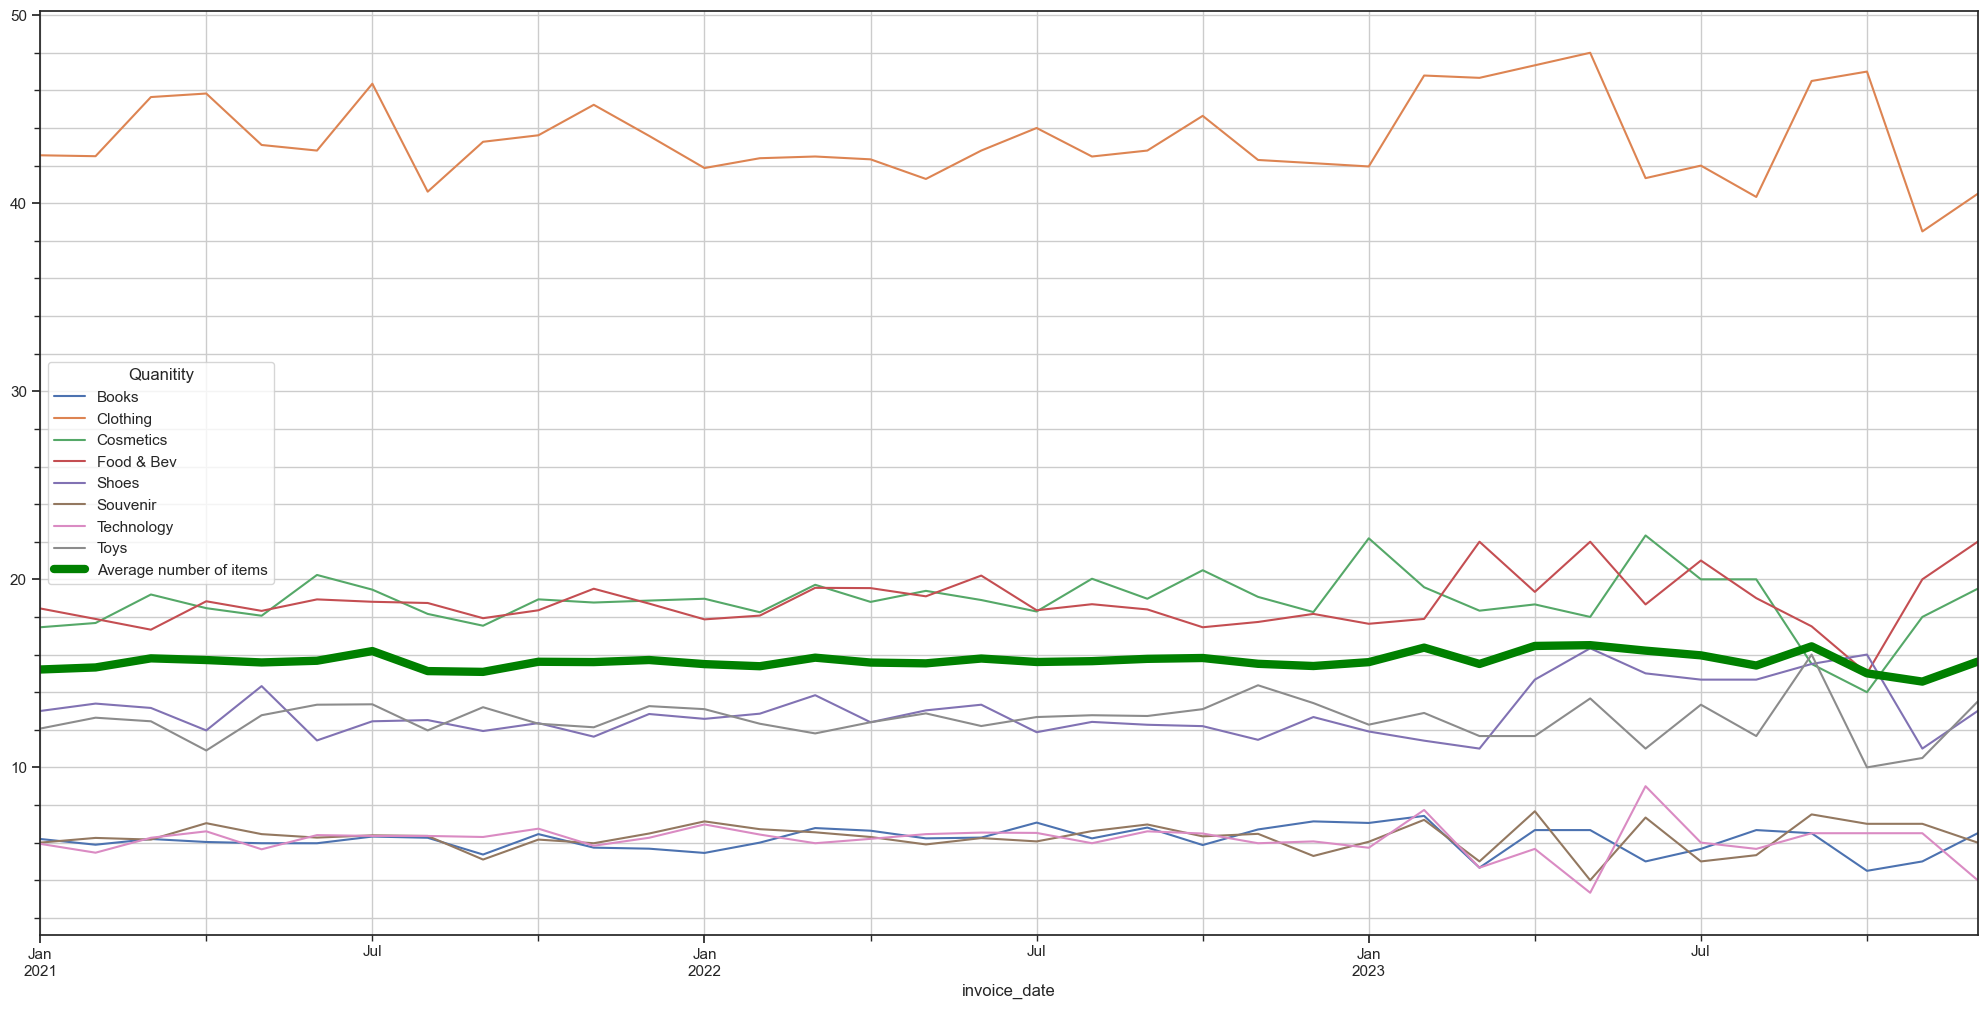

In [401]:
import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%m')

plt.figure(figsize = (15,7))
sns.set(style="ticks")
plt.grid(True)

date_book_sampled = date_grouped3['Books'].resample('m').mean()
date_Clothing_sampled = date_grouped3['Clothing'].resample('m').mean()
date_cosmetics_sampled = date_grouped3['Cosmetics'].resample('m').mean()
date_food_sampled = date_grouped3['Food & Beverage'].resample('m').mean()
date_shoes_sampled = date_grouped3['Shoes'].resample('m').mean()
date_souvener_sampled = date_grouped3['Souvenir'].resample('m').mean()
date_technology_sampled = date_grouped3['Technology'].resample('m').mean()
date_toys_sampled = date_grouped3['Toys'].resample('m').mean()

date_average_sampled = date_grouped3['avg_number_items'].resample('m').mean()



ax = date_book_sampled.plot(figsize=(25, 12))
ax = date_Clothing_sampled.plot(figsize=(25, 12))
ax = date_cosmetics_sampled.plot(figsize=(25, 12))
ax = date_food_sampled.plot(figsize=(25, 12))
ax = date_shoes_sampled.plot(figsize=(25, 12))
ax = date_souvener_sampled.plot(figsize=(25, 12))
ax = date_technology_sampled.plot(figsize=(25, 12))
ax = date_toys_sampled.plot(figsize=(25, 12))
ax = date_average_sampled.plot(figsize=(25, 12),linewidth=6.0,color='green')

#ax.xaxis.set_minor_locator(months)
plt.legend(["Books","Clothing","Cosmetics","Food & Bev","Shoes","Souvenir","Technology","Toys","Average number of items"], title="Quanitity", loc="center left")
plt.grid(True)
ax.grid(which = "minor")
ax.minorticks_on()
ax.yaxis.grid(True)

In [402]:
df4

,invoice_no,passenger_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon
1,I317333,C111565,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Clothing,1,300.08,Cash,2021-09-11,Metrocity
3,I173702,C988172,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Books,4,60.60,Cash,2021-10-24,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon
99453,I325143,C569580,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul
99454,I824010,C103292,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity
99455,I702964,C800631,Technology,4,4200.00,Cash,2021-03-16,Istinye Park
